# House Prices - Advanced Regression Techniques

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os

**Load the training and test data from CSV files**

In [97]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

--

**Display the first 10 rows of the Raw Dataset**

In [98]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


--

**Defining which columns in the dataset will be used as features (input variables) and which one will be the target (output variable).**

**Continuous features are numeric and can be scaled (LotArea, GrLivArea), while categorical features are non-numeric and need encoding (MSZoning, HouseStyle) [This encoding is done later on].**

In [99]:
continuous_features = ["LotArea", "GrLivArea"]
categorical_features = ["MSZoning", "HouseStyle"]
target = "SalePrice"

--

**Checking Missing information in the Selected Features.**  

In [100]:
print("Missing Values in selected columns (Train Data):")
print(train_df[continuous_features + categorical_features].isnull().sum())

Missing Values in selected columns (Train Data):
LotArea       0
GrLivArea     0
MSZoning      0
HouseStyle    0
dtype: int64


Since no missing values, handling is not required.

--

**Separate the features (X) and the target (y) in the training set**
 * Split the data into training and validation sets (ratio for the split is 80:20)

In [101]:
X = train_df[continuous_features + categorical_features]
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train

,LotArea,GrLivArea,MSZoning,HouseStyle
254,8400,1314,RL,1Story
1066,7837,1571,RL,2Story
638,8777,796,RL,1Story
799,7200,1768,RL,1.5Fin
380,5000,1691,RL,1.5Fin
...,...,...,...,...
1095,9317,1314,RL,1Story
1130,7804,1981,RL,1.5Fin
1294,8172,864,RL,1Story
860,7642,1426,RL,1.5Fin


In [103]:
X_val

,LotArea,GrLivArea,MSZoning,HouseStyle
892,8414,1068,RL,1Story
1105,12256,2622,RL,2Story
413,8960,1028,RM,1Story
522,5000,1664,RM,1.5Fin
1036,12898,1620,RL,1Story
...,...,...,...,...
479,5925,1131,RM,1Story
1361,16158,1530,RL,1Story
802,8199,1456,RL,2Story
651,9084,1510,RL,2Story


--

**Scale the continuous features**
* StandardScaler scales the features to have a mean of 0 and a standard deviation of 1

In [104]:
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[continuous_features])
X_val_cont = scaler.transform(X_val[continuous_features])
X_test_cont = scaler.transform(test_df[continuous_features])

In [105]:
X_train_cont

array([[-0.21289571, -0.40709315],
       [-0.26524463,  0.08317013],
       [-0.17784146, -1.39525026],
       ...,
       [-0.23409563, -1.26553079],
       [-0.28337613, -0.19343756],
       [-0.65139925,  0.0526479 ]])

In [106]:
X_test_cont

array([[ 0.08669258, -1.20448634],
       [ 0.33263021, -0.37847856],
       [ 0.29199704,  0.1938132 ],
       ...,
       [ 0.86569654, -0.57878068],
       [-0.02311926, -1.06332104],
       [-0.09880669,  0.90154735]])

--

# Convert categorical variables into numerical form using One-Hot Encoding.
* One-hot encoding converts each category into a binary vector.
    * drop="first" avoids the dummy variable trap, where having all categories in the model can lead to multicollinearity.
    * handle_unknown='ignore' ensures the model doesn't fail if it encounters a previously unseen category during testing.

In [107]:
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_val_cat = encoder.transform(X_val[categorical_features])
X_test_cat = encoder.transform(test_df[categorical_features])

C:\Users\Acer\miniconda3\envs\pw1\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [108]:
X_train_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

--

**Combine the scaled continuous features and one-hot encoded categorical features into a single dataset for training.**

In [109]:
X_train_processed = np.hstack((X_train_cont, X_train_cat))
X_val_processed = np.hstack((X_val_cont, X_val_cat))
X_test_processed = np.hstack((X_test_cont, X_test_cat))

In [110]:
X_train_processed

array([[-0.21289571, -0.40709315,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26524463,  0.08317013,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.17784146, -1.39525026,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.23409563, -1.26553079,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28337613, -0.19343756,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65139925,  0.0526479 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [111]:
os.makedirs('data/processed', exist_ok=True)
train_processed.to_parquet('data/processed/train_processed.parquet', engine='fastparquet', compression='GZIP')
val_processed.to_parquet('data/processed/val_processed.parquet', engine='fastparquet', compression='GZIP')
test_processed.to_parquet('data/processed/test_processed.parquet', engine='fastparquet', compression='GZIP')

print("Processed data has been saved to parquet files in the 'data/processed' directory")

Processed data has been saved to parquet files in the 'data/processed' directory


--

# Training the model using Gradient Boosting Regressor and track performance using RMSLE

* n_estimators=1 starts with 1 tree, and the number of trees increases as the epochs progress due to warm_start=True. This helps improve performance over time.
* we display the performance after every 10 epochs
* since the value of the error is decreasing we can infer that model accuracy is increasing.

In [89]:
epochs = 50  
model = GradientBoostingRegressor(n_estimators=1, warm_start=True)  
rmsle_scores = []

In [90]:
print("Training the model...")
for epoch in tqdm(range(1, epochs + 1), desc="Epoch Progress"):
    model.n_estimators += 1  
    model.fit(X_train_processed, y_train)  
    time.sleep(0.1) 
   
    if epoch % 10 == 0:
        y_pred = model.predict(X_val_processed)
        rmsle_score = np.sqrt(mean_squared_log_error(y_val, np.maximum(y_pred, 0)))
        rmsle_scores.append(rmsle_score)
        print(f"Epoch {epoch}: RMSLE = {round(rmsle_score, 4)}")


Training the model...


Epoch Progress:  22%|█████▋                    | 11/50 [00:01<00:04,  9.19it/s]

Epoch 10: RMSLE = 0.2991


Epoch Progress:  42%|██████████▉               | 21/50 [00:02<00:03,  9.15it/s]

Epoch 20: RMSLE = 0.2619


Epoch Progress:  62%|████████████████          | 31/50 [00:03<00:02,  9.21it/s]

Epoch 30: RMSLE = 0.2486


Epoch Progress:  82%|█████████████████████▎    | 41/50 [00:04<00:00,  9.10it/s]

Epoch 40: RMSLE = 0.2417


Epoch Progress: 100%|██████████████████████████| 50/50 [00:05<00:00,  9.13it/s]

Epoch 50: RMSLE = 0.2388


--

**Making predictions on the test data and save them to a CSV file.**
* The model predicts SalePrice based on the features of the test data, and the results are saved for submission. The np.maximum ensures that the predicted prices are non-negative.

In [91]:
test_predictions = model.predict(X_test_processed)
test_predictions = np.maximum(test_predictions, 0)  

In [92]:
submission = pd.DataFrame({"Id": test_df["Id"], "SalePrice": test_predictions})

In [93]:
submission

,Id,SalePrice
0,1461,108976.153737
1,1462,180765.799770
2,1463,179294.833234
3,1464,169685.520285
4,1465,159761.604170
...,...,...
1454,2915,111770.055491
1455,2916,111770.055491
1456,2917,159619.740842
1457,2918,133522.539426


In [94]:
submission.to_csv("../data/submission_GradientBoostingRegressor.csv", index=False)
print("Predictions saved")

Predictions saved


--

# Plot the RMSLE score at every 10th epoch to visualize model performance during training.

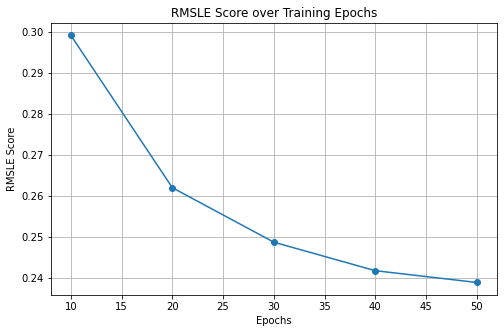

In [95]:
plt.figure(figsize=(8, 5))
plt.plot(range(10, epochs+1, 10), rmsle_scores, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("RMSLE Score")
plt.title("RMSLE Score over Training Epochs")
plt.grid(True)
plt.show()